In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq,ifft

In [3]:
with open('samples.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        print(*row, sep= ', ')

'Elapsed time', 'ECG I', 'ECG I filtered'
'hh:mm:ss.mmm', 'mV', 'mV'
'0:00.000', -0.085, -0.115
'0:00.002', -0.080, -0.115
'0:00.004', -0.070, -0.120
'0:00.006', -0.075, -0.120
'0:00.008', -0.095, -0.120
'0:00.010', -0.090, -0.120
'0:00.012', -0.100, -0.120
'0:00.014', -0.100, -0.115
'0:00.016', -0.100, -0.115
'0:00.018', -0.085, -0.115
'0:00.020', -0.060, -0.110
'0:00.022', -0.045, -0.110
'0:00.024', -0.055, -0.110
'0:00.026', -0.060, -0.110
'0:00.028', -0.070, -0.105
'0:00.030', -0.080, -0.105
'0:00.032', -0.085, -0.105
'0:00.034', -0.080, -0.105
'0:00.036', -0.070, -0.100
'0:00.038', -0.040, -0.100
'0:00.040', -0.050, -0.100
'0:00.042', -0.045, -0.100
'0:00.044', -0.040, -0.100
'0:00.046', -0.040, -0.100
'0:00.048', -0.055, -0.100
'0:00.050', -0.060, -0.100
'0:00.052', -0.055, -0.100
'0:00.054', -0.055, -0.095
'0:00.056', -0.055, -0.095
'0:00.058', -0.045, -0.095
'0:00.060', -0.040, -0.095
'0:00.062', -0.045, -0.090
'0:00.064', -0.040, -0.090
'0:00.066', -0.030, -0.090
'0:00.068', -

In [4]:
df = pd.read_csv('samples.csv')
print(df)

      'Elapsed time' 'ECG I' 'ECG I filtered'
0     'hh:mm:ss.mmm'    'mV'             'mV'
1         '0:00.000'  -0.085           -0.115
2         '0:00.002'  -0.080           -0.115
3         '0:00.004'  -0.070           -0.120
4         '0:00.006'  -0.075           -0.120
...              ...     ...              ...
4996      '0:09.990'   0.015            0.095
4997      '0:09.992'   0.030            0.095
4998      '0:09.994'   0.020            0.095
4999      '0:09.996'   0.035            0.095
5000      '0:09.998'   0.040            0.095

[5001 rows x 3 columns]


In [5]:
df.drop(0, axis=0)
df

,'Elapsed time','ECG I','ECG I filtered'
0,'hh:mm:ss.mmm','mV','mV'
1,'0:00.000',-0.085,-0.115
2,'0:00.002',-0.080,-0.115
3,'0:00.004',-0.070,-0.120
4,'0:00.006',-0.075,-0.120
...,...,...,...
4996,'0:09.990',0.015,0.095
4997,'0:09.992',0.030,0.095
4998,'0:09.994',0.020,0.095
4999,'0:09.996',0.035,0.095


In [6]:
df.drop([0],axis=0, inplace=True)
df

,'Elapsed time','ECG I','ECG I filtered'
1,'0:00.000',-0.085,-0.115
2,'0:00.002',-0.080,-0.115
3,'0:00.004',-0.070,-0.120
4,'0:00.006',-0.075,-0.120
5,'0:00.008',-0.095,-0.120
...,...,...,...
4996,'0:09.990',0.015,0.095
4997,'0:09.992',0.030,0.095
4998,'0:09.994',0.020,0.095
4999,'0:09.996',0.035,0.095


In [7]:
df.rename(columns={"'Elapsed time'" : "Elapsedtime"},inplace=True)
df.rename(columns={"'ECG I'" : "ECGI"},inplace=True)
df.rename(columns={"'ECG I filtered'" : "ECGIfiltered"},inplace=True)
print(df)

     Elapsedtime    ECGI ECGIfiltered
1     '0:00.000'  -0.085       -0.115
2     '0:00.002'  -0.080       -0.115
3     '0:00.004'  -0.070       -0.120
4     '0:00.006'  -0.075       -0.120
5     '0:00.008'  -0.095       -0.120
...          ...     ...          ...
4996  '0:09.990'   0.015        0.095
4997  '0:09.992'   0.030        0.095
4998  '0:09.994'   0.020        0.095
4999  '0:09.996'   0.035        0.095
5000  '0:09.998'   0.040        0.095

[5000 rows x 3 columns]


In [8]:
dfn=df.drop(['Elapsedtime'],axis=1, inplace=False)
dfn.drop(['ECGI'],axis=1, inplace=True)
dfn

,ECGIfiltered
1,-0.115
2,-0.115
3,-0.120
4,-0.120
5,-0.120
...,...
4996,0.095
4997,0.095
4998,0.095
4999,0.095


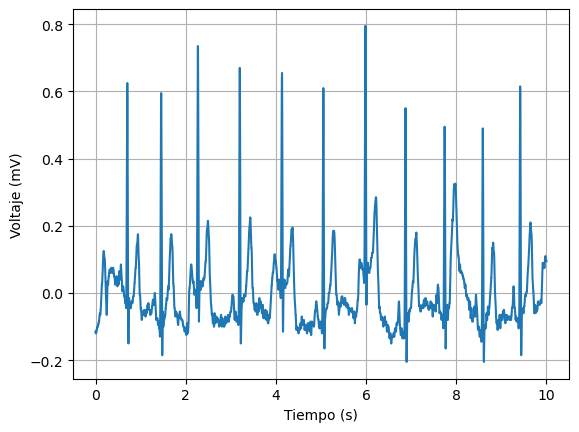

In [9]:
B = 140 #ancho de banda
f_s = 500 #frec. de muestreo
N = 5000  # muestras
T = N/f_s #tiempo de muestreo total
fs = 1 / f_s #periodo de muestreo

t = np.linspace(0, T, N) #arreglo 

data_ecg = dfn['ECGIfiltered'].values.astype(float)

plt.figure()
plt.plot(t, data_ecg)
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (mV)')
plt.grid()
plt.show()


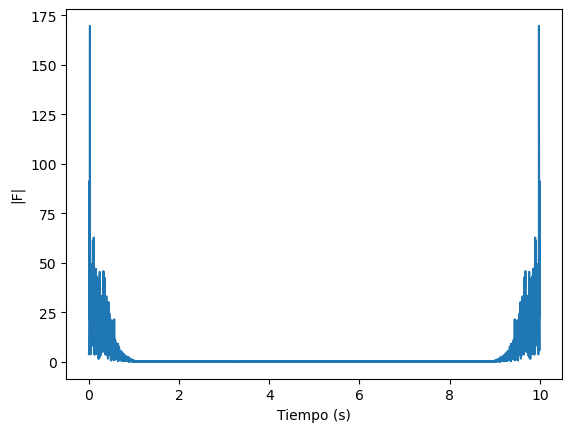

In [10]:
F = fft(data_ecg) #fft a la norma de los datos

plt.plot(t, abs(F)) #grafica t que se presentó anteriormente contra el valor absoluto de la fft de los datos
plt.xlabel('Tiempo (s)')
plt.ylabel('|F|')
plt.show()

(-100.0, 100.0)

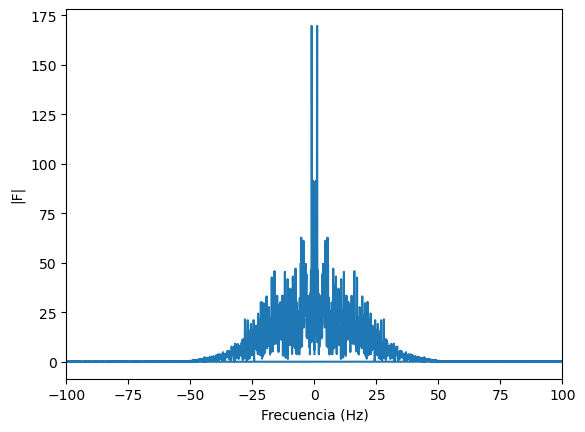

In [11]:
f = fftfreq(N, 1.0/f_s)
#mueve al espacio de las frecuencias
mask = np.where(f >= 0) 
#mask si son menores a 0 los ajusta
plt.plot(f, abs(F))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('|F|')
plt.xlim(-100,100)

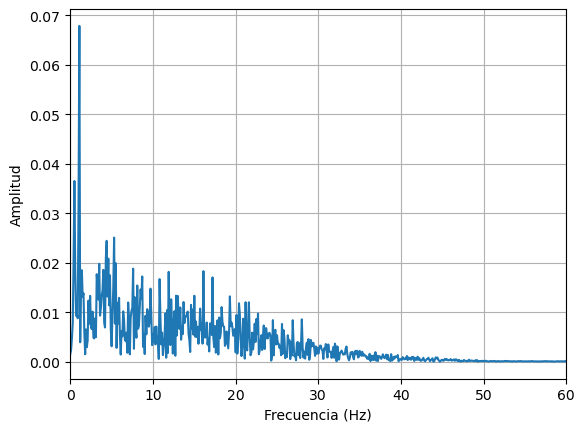

In [12]:
yf = F
xf = np.linspace(0.0, 1.0/(2.0*fs), N//2)
#1/2*fs es la resolución de la frec. 
plt.plot(xf, 2.0/N * abs(yf[0:N//2]))
plt.grid()
plt.xlim(0,60)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

In [49]:
df['ganancia'] = df['ECGIfiltered'].values.astype(float) - df['ECGI'].values.astype(float)
ganancia = df['ganancia']
print(df['ganancia'])

1      -0.030
2      -0.035
3      -0.050
4      -0.045
5      -0.025
        ...  
4996    0.080
4997    0.065
4998    0.075
4999    0.060
5000    0.055
Name: ganancia, Length: 5000, dtype: float64


In [53]:
prom = abs(np.mean(ganancia))
print(prom)

0.00833500000000005


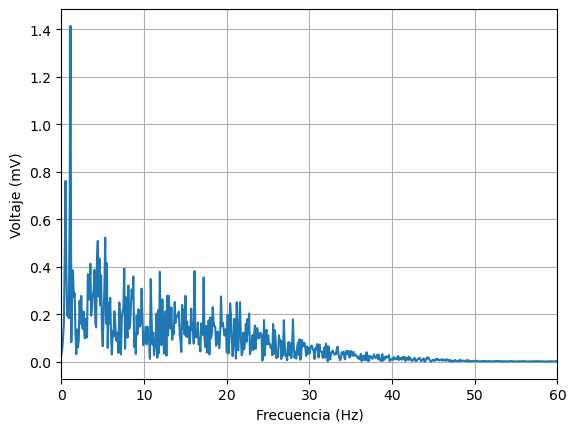

In [55]:
yf = F
xf = np.linspace(0.0, 1.0/(2.0*fs), N//2)

ganancia = prom  

plt.plot(xf, ganancia * abs(yf[0:N//2]))

plt.grid()
plt.xlim(0, 60)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Voltaje (mV)')

plt.show()